In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [6]:
final_data=pd.read_csv("C:/Users/11202/Desktop/final_data.csv",index_col=0)

In [7]:
final_data

,url,label,cookie_len,form_num,anchor_num,input_email,input_password,hidden,ip_address,Request_url,...,web_traffic,number,ifEmail,DNSRecord,ifSymbolAT,url_length,domain_length,subdomain_length,is_https,special_char
0,http://www.asepib.ch/MyUps/UPS.htm,phishing,0.0,3.0,65.0,False,False,False,0,1,...,1,4,False,False,True,34,6,3,0.0,0.0
1,http://www.warface.net78.net/,phishing,0.0,0.0,3.0,False,False,False,0,1,...,1,11,True,True,True,29,5,11,0.0,0.0
2,http://www.taql.net/ladocs/google/index.htm,phishing,0.0,1.0,9.0,False,False,False,0,0,...,1,24,True,True,True,43,4,3,0.0,0.0
3,http://zebrezebre.com/eimprovement/,phishing,0.0,2.0,7.0,False,False,False,0,0,...,1,40,True,True,True,35,10,0,0.0,0.0
4,http://www.roninsushi.com/wp-includes/fonts/ro...,phishing,0.0,0.0,15.0,False,False,False,0,1,...,0,84,True,True,True,82,10,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27014,https://www.microsoftpressstore.com/store/wind...,legitimate,1.0,1.0,74.0,False,False,True,0,1,...,0,25413,True,True,True,210,19,3,1.0,1.0
27015,https://www.moneysavingexpert.com/team-blog/ta...,legitimate,1.0,1.0,1.0,False,False,True,0,1,...,1,25420,True,True,True,58,17,3,1.0,0.0
27016,https://www.edexcel.com/quals/gce/gce08/lang/f...,legitimate,2.0,1.0,202.0,False,False,True,0,1,...,1,25421,True,True,True,70,7,3,1.0,0.0
27017,https://www.happinessishomemade.net/st-patrick...,legitimate,0.0,5.0,201.0,True,False,True,0,0,...,0,25422,True,True,True,78,19,3,1.0,0.0


In [8]:
final_data["input_email"]

0        False
1        False
2        False
3        False
4        False
         ...  
27014    False
27015    False
27016    False
27017     True
27018    False
Name: input_email, Length: 27019, dtype: bool

In [9]:
final_data.loc[final_data["input_email"]==True,"input_email"]=1
final_data.loc[final_data["input_email"]==False,"input_email"]=0

In [10]:
final_data["input_email"]

0        0
1        0
2        0
3        0
4        0
        ..
27014    0
27015    0
27016    0
27017    1
27018    0
Name: input_email, Length: 27019, dtype: object

In [11]:
final_data.loc[final_data["input_password"]==True,"input_password"]=1
final_data.loc[final_data["input_password"]==False,"input_password"]=0

In [12]:
final_data["input_password"]

0        0
1        0
2        0
3        0
4        0
        ..
27014    0
27015    0
27016    0
27017    0
27018    0
Name: input_password, Length: 27019, dtype: object

In [13]:
final_data.loc[1]

url                 http://www.warface.net78.net/
label                                    phishing
cookie_len                                    0.0
form_num                                      0.0
anchor_num                                    3.0
input_email                                     0
input_password                                  0
hidden                                      False
ip_address                                      0
Request_url                                     1
redirect_page                                   0
Mouse_event                                     0
right_click                                     0
Iframe                                          1
web_traffic                                     1
number                                         11
ifEmail                                      True
DNSRecord                                    True
ifSymbolAT                                   True
url_length                                     29


In [14]:
final_data.loc[final_data["hidden"]==True,"hidden"]=1
final_data.loc[final_data["hidden"]==False,"hidden"]=0

In [15]:
final_data["hidden"]

0        0
1        0
2        0
3        0
4        0
        ..
27014    1
27015    1
27016    1
27017    1
27018    1
Name: hidden, Length: 27019, dtype: object

In [16]:
final_data.loc[final_data["ifEmail"]==True,"ifEmail"]=1
final_data.loc[final_data["ifEmail"]==False,"ifEmail"]=0

In [17]:
final_data["ifEmail"]

0        0
1        1
2        1
3        1
4        1
        ..
27014    1
27015    1
27016    1
27017    1
27018    1
Name: ifEmail, Length: 27019, dtype: object

In [18]:
final_data.loc[final_data["DNSRecord"]==True,"DNSRecord"]=1
final_data.loc[final_data["DNSRecord"]==False,"DNSRecord"]=0

In [19]:
final_data["DNSRecord"]

0        0
1        1
2        1
3        1
4        1
        ..
27014    1
27015    1
27016    1
27017    1
27018    1
Name: DNSRecord, Length: 27019, dtype: object

In [20]:
final_data.loc[final_data["ifSymbolAT"]==True,"ifSymbolAT"]=1
final_data.loc[final_data["ifSymbolAT"]==False,"ifSymbolAT"]=0

In [21]:
final_data["ifSymbolAT"]

0        1
1        1
2        1
3        1
4        1
        ..
27014    1
27015    1
27016    1
27017    1
27018    1
Name: ifSymbolAT, Length: 27019, dtype: object

In [22]:
final_data

,url,label,cookie_len,form_num,anchor_num,input_email,input_password,hidden,ip_address,Request_url,...,web_traffic,number,ifEmail,DNSRecord,ifSymbolAT,url_length,domain_length,subdomain_length,is_https,special_char
0,http://www.asepib.ch/MyUps/UPS.htm,phishing,0.0,3.0,65.0,0,0,0,0,1,...,1,4,0,0,1,34,6,3,0.0,0.0
1,http://www.warface.net78.net/,phishing,0.0,0.0,3.0,0,0,0,0,1,...,1,11,1,1,1,29,5,11,0.0,0.0
2,http://www.taql.net/ladocs/google/index.htm,phishing,0.0,1.0,9.0,0,0,0,0,0,...,1,24,1,1,1,43,4,3,0.0,0.0
3,http://zebrezebre.com/eimprovement/,phishing,0.0,2.0,7.0,0,0,0,0,0,...,1,40,1,1,1,35,10,0,0.0,0.0
4,http://www.roninsushi.com/wp-includes/fonts/ro...,phishing,0.0,0.0,15.0,0,0,0,0,1,...,0,84,1,1,1,82,10,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27014,https://www.microsoftpressstore.com/store/wind...,legitimate,1.0,1.0,74.0,0,0,1,0,1,...,0,25413,1,1,1,210,19,3,1.0,1.0
27015,https://www.moneysavingexpert.com/team-blog/ta...,legitimate,1.0,1.0,1.0,0,0,1,0,1,...,1,25420,1,1,1,58,17,3,1.0,0.0
27016,https://www.edexcel.com/quals/gce/gce08/lang/f...,legitimate,2.0,1.0,202.0,0,0,1,0,1,...,1,25421,1,1,1,70,7,3,1.0,0.0
27017,https://www.happinessishomemade.net/st-patrick...,legitimate,0.0,5.0,201.0,1,0,1,0,0,...,0,25422,1,1,1,78,19,3,1.0,0.0


In [23]:
x_train=final_data.iloc[:,2:23]
y_train=final_data.iloc[:,1]

In [24]:
y_train

0          phishing
1          phishing
2          phishing
3          phishing
4          phishing
            ...    
27014    legitimate
27015    legitimate
27016    legitimate
27017    legitimate
27018    legitimate
Name: label, Length: 27019, dtype: object

In [25]:
from sklearn.preprocessing import StandardScaler

In [ ]:
forest=RandomForestClassifier(n_estimators=10000,random_state=0,class_weight={"legitimate":0.57,"phishing":0.43})
forest.fit(x_train,y_train)

In [ ]:
importances=forest.feature_importances_
print("Importance:",importances)

In [112]:
feature_label=['cookie_len','form_num',  'anchor_num', 'input_email', 'input_password', 'hidden ip_address',
            'Request_url', 'redirect_page',' Mouse_event', 'right_click' ,'Iframe' ,'web_traffic' ,'number' ,'ifEmail', 'DNSRecord' ,'ifSymbolAT' ,'url_length' ,'domain_length' ,'subdomain_length' ,'is_https' ,'special_char'
]

In [22]:
from matplotlib import pyplot as plt


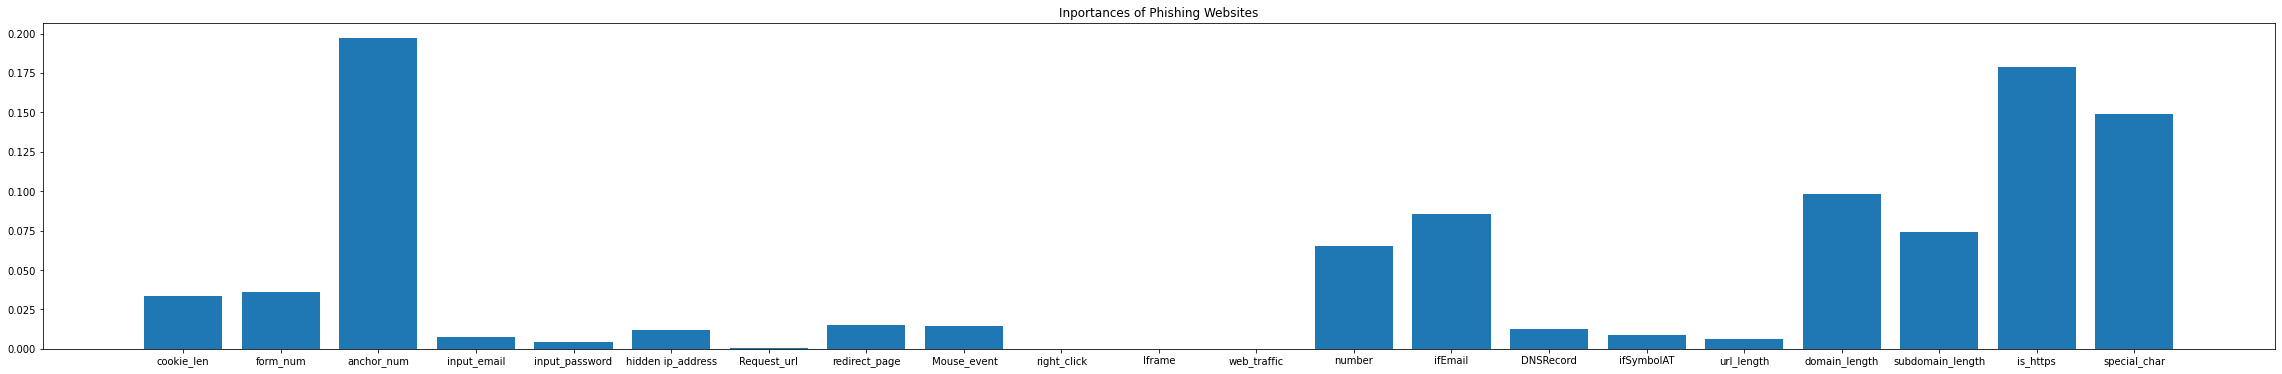

In [114]:
plt.figure(figsize=(40, 6))
plt.title("Inportances of Phishing Websites")
plt.bar(feature_label,importances)
plt.show()

In [4]:
from sklearn import preprocessing


In [134]:
origin_data=pd.read_csv("./final_data.csv",nrows=15000,index_col=0)

In [135]:
origin_data

,url,label,cookie_len,form_num,anchor_num,input_email,input_password,hidden,ip_address,Request_url,...,web_traffic,number,ifEmail,DNSRecord,ifSymbolAT,url_length,domain_length,subdomain_length,is_https,special_char
0,http://www.asepib.ch/MyUps/UPS.htm,phishing,0.0,3.0,65.0,False,False,False,0,1,...,1,4,False,False,True,34,6,3,0.0,0.0
1,http://www.warface.net78.net/,phishing,0.0,0.0,3.0,False,False,False,0,1,...,1,11,True,True,True,29,5,11,0.0,0.0
2,http://www.taql.net/ladocs/google/index.htm,phishing,0.0,1.0,9.0,False,False,False,0,0,...,1,24,True,True,True,43,4,3,0.0,0.0
3,http://zebrezebre.com/eimprovement/,phishing,0.0,2.0,7.0,False,False,False,0,0,...,1,40,True,True,True,35,10,0,0.0,0.0
4,http://www.roninsushi.com/wp-includes/fonts/ro...,phishing,0.0,0.0,15.0,False,False,False,0,1,...,0,84,True,True,True,82,10,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,http://www.interest.com/car-loans/news/leasing...,legitimate,0.0,0.0,26.0,False,False,False,0,0,...,0,22866,True,True,True,76,8,3,0.0,0.0
14996,https://www.idrettsforbundet.no/globalassets/i...,legitimate,4.0,1.0,84.0,False,False,False,0,1,...,0,22870,True,True,True,124,16,3,1.0,1.0
14997,https://startups.co.uk/ellas-kitchen-paul-lind...,legitimate,0.0,1.0,92.0,False,False,False,0,0,...,1,22871,True,True,True,50,8,0,1.0,0.0
14998,https://www.connectsafely.org/kids-skating-ahe...,legitimate,1.0,1.0,127.0,False,False,False,0,0,...,0,22873,True,True,True,68,13,3,1.0,0.0


In [136]:
origin_data.loc[origin_data["label"]=="phishing","label"]=1
origin_data.loc[origin_data["label"]=="legitimate","label"]=0

In [137]:
Y=origin_data.iloc[:,1]

In [138]:
Top_feature=[4,15,16,19,20,21,22,23]

In [139]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
14995    0
14996    0
14997    0
14998    0
14999    0
Name: label, Length: 15000, dtype: object

In [140]:
X=origin_data.iloc[:,Top_feature]

In [141]:
X

,anchor_num,number,ifEmail,url_length,domain_length,subdomain_length,is_https,special_char
0,65.0,4,False,34,6,3,0.0,0.0
1,3.0,11,True,29,5,11,0.0,0.0
2,9.0,24,True,43,4,3,0.0,0.0
3,7.0,40,True,35,10,0,0.0,0.0
4,15.0,84,True,82,10,3,0.0,0.0
...,...,...,...,...,...,...,...,...
14995,26.0,22866,True,76,8,3,0.0,0.0
14996,84.0,22870,True,124,16,3,1.0,1.0
14997,92.0,22871,True,50,8,0,1.0,0.0
14998,127.0,22873,True,68,13,3,1.0,0.0


In [142]:
from sklearn.model_selection import train_test_split

In [143]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)

In [144]:
ytest

7721     0
12878    0
11432    0
7256     0
14212    0
        ..
634      1
1352     1
11779    0
2716     1
13559    0
Name: label, Length: 4500, dtype: object

In [77]:
from sklearn.svm import SVR

In [41]:
model_svr=SVR(kernel="rbf",C=50,max_iter=1000)

In [120]:
forest1=RandomForestClassifier(n_estimators=10000,random_state=0,class_weight="balanced")
forest1.fit(xtrain,ytrain)

RandomForestClassifier(class_weight='balanced', n_estimators=10000,
                       random_state=0)

In [42]:
model_svr.fit(xtrain,ytrain)

SVR(C=50, max_iter=1000)

In [43]:
score=model_svr.score(xtest,ytest)
print(score)

0.933323412555361


In [121]:
score1=forest1.score(xtest,ytest)
print(score1)

0.9266666666666666


In [180]:
def plot_confusion_matrix2(cm_input, title='XGBoost Confusion Matrix'):
    labels=['phishing','legitimate']
    cm = cm_input.astype('float') / cm_input.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.text(-0.15,0.05, '%.3f' %cm[0][0],fontsize=14,color = 'w')
    plt.text(0.8,0.05, '%.3f' %cm[0][1],fontsize=14,color = 'k')
    plt.text(-0.15,1.05, '%.3f' %cm[1][0],fontsize=14,color = 'k')
    plt.text(0.8,1.05, '%.3f' %cm[1][1],fontsize=14,color = 'w')
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    np.set_printoptions(precision=2)
    # show confusion matrix
    plt.show()

In [59]:
y_predict=forest1.predict(xtest)

In [60]:
y_predict

array(['legitimate', 'legitimate', 'legitimate', ..., 'phishing',
       'legitimate', 'legitimate'], dtype=object)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusionRandomForest=confusion_matrix(ytest,y_predict)

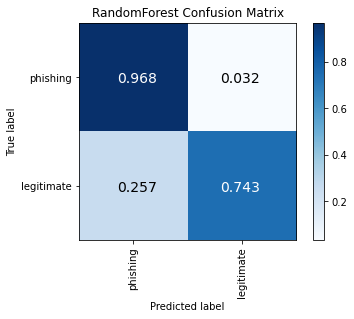

<Figure size 432x288 with 0 Axes>

In [27]:
plot_confusion_matrix2(confusionRandomForest)
plt.savefig("RandomForest_confusion_matrix.png")

In [145]:
import xgboost as xgb
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [146]:
parameters={
    "max_depth":[2,4,6],
    "eta":[0.01,0.05,0.1,0.2],
    "objective":["binary:logistic","reg:logistic"]
}
num_round=6

In [147]:
bts1=XGBRFClassifier()

In [148]:
model_grid=GridSearchCV(bts1,parameters)
model_grid.fit(xtrain,ytrain)
print(model_grid.best_params_)

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\11202\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_

{'eta': 0.01, 'max_depth': 2, 'objective': 'binary:logistic'}


In [151]:
bst1=XGBRFClassifier(max_depth=2,eta=0.01,n_estimators=100,objective='binary:logistic')

In [166]:
bst1.fit(xtrain,ytrain)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False, eta=0.01,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='', max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=2,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                sampling_method='uniform', ...)

In [167]:
y_scores=bst1.predict_proba(xtest)
y_pred=y_scores[:,1]
y_pred=np.around(y_pred,0).astype(int)

In [171]:
ytest=np.array(ytest)

In [175]:
ytest=ytest.astype(int)

In [176]:
accuracy_score(ytest,y_pred)

0.8886666666666667

In [178]:
confusionXGBoost=confusion_matrix(ytest,y_pred)

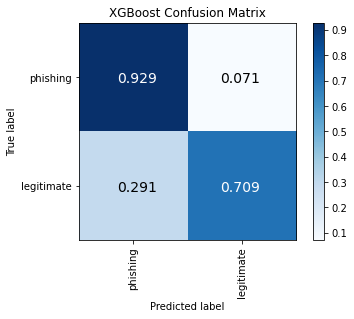

In [181]:
plot_confusion_matrix2(confusionXGBoost)